In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
ellipsisCenter = [[40., 0.], [40., 20.]]
ellipsisAxis = [32., 8.]
nMain = 0.8
nBack = 0.2
widthRatio = 0.3
Epsilon = 1e-6

In [3]:
def slot(x):
    return np.heaviside(x+1, 0.5)-np.heaviside(x-1, 0.5)


def polynom(x):
    return -6*np.abs(x)**5++15*x**4-10*np.abs(x)**3+1


def profile(x):
    a = slot(x)
    b = polynom(x)
    c = slot(x)*polynom(x)
    return slot(x)*polynom(x)

In [4]:
def density(x, y):
    assert x.shape == y.shape
    funcs = np.zeros((x.shape[0], x.shape[1], 2))
    for i in range(2):
        x_ = (x-ellipsisCenter[i][0])/ellipsisAxis[0]
        y_ = (y-ellipsisCenter[i][1])/ellipsisAxis[1]
        r_ = np.sqrt(x_**2+y_**2)
        funcs[:, :, i] = nMain*profile(r_)
    return funcs.sum(axis=2)

In [5]:
def bx(x, y):
    assert x.shape == y.shape
    funcs = np.zeros((x.shape[0], x.shape[1], 2))
    for i in range(2):
        x_ = (x-ellipsisCenter[i][0])/ellipsisAxis[0]
        y_ = (y-ellipsisCenter[i][1])/ellipsisAxis[1]
        r_ = np.sqrt(x_**2+y_**2)
        s_ = (r_-1)/widthRatio

        X_ = +y_/ellipsisAxis[1]
        Y_ = -x_/ellipsisAxis[0]
        R_ = np.clip(np.sqrt(X_**2+Y_**2), Epsilon, None)

        # normalisation to ensiure divB == 0
        Z_ = np.clip(ellipsisAxis[1]*R_/r_, Epsilon, None)

        funcs[:, :, i] = profile(s_)*Z_*X_/R_
    return funcs.sum(axis=2)

In [6]:
def by(x, y):
    assert x.shape == y.shape
    funcs = np.zeros((x.shape[0], x.shape[1], 2))
    for i in range(2):
        x_ = (x-ellipsisCenter[i][0])/ellipsisAxis[0]
        y_ = (y-ellipsisCenter[i][1])/ellipsisAxis[1]
        r_ = np.sqrt(x_**2+y_**2)
        s_ = (r_-1)/widthRatio

        X_ = +y_/ellipsisAxis[1]
        Y_ = -x_/ellipsisAxis[0]
        R_ = np.clip(np.sqrt(X_**2+Y_**2), Epsilon, None)

        # normalisation to ensiure divB == 0
        Z_ = np.clip(ellipsisAxis[1]*R_/r_, Epsilon, None)

        funcs[:, :, i] = profile(s_)*Z_*Y_/R_
    return funcs.sum(axis=2)

In [7]:
nCells = [100, 400]

In [8]:
x = np.linspace(0, 80, 400)
y = np.linspace(0, 20, 100)
x_, y_ = np.meshgrid(x, y)

In [9]:
n_ = density(x_, y_)
bx_ = bx(x_, y_)
by_ = by(x_, y_)
b2_ = bx_**2+by_**2

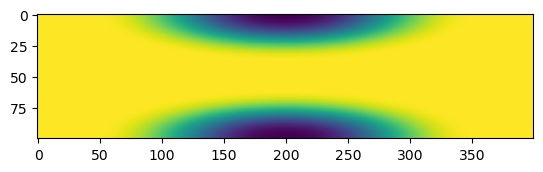

In [10]:
cmap = mpl.colormaps['viridis_r']
fig, ax = plt.subplots()
im = ax.imshow(n_, cmap=cmap)

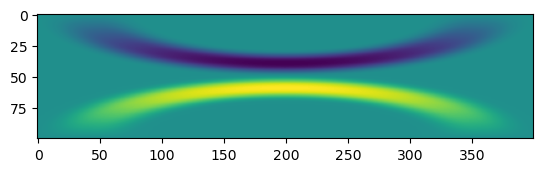

In [11]:
cmap = mpl.colormaps['viridis_r']
fig, ax = plt.subplots()
im = ax.imshow(bx_, cmap=cmap)

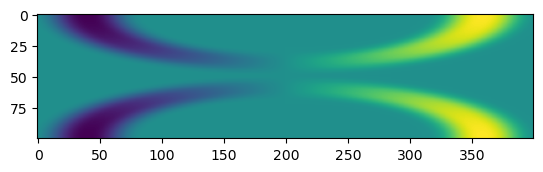

In [12]:
cmap = mpl.colormaps['viridis_r']
fig, ax = plt.subplots()
im = ax.imshow(by_, cmap=cmap)

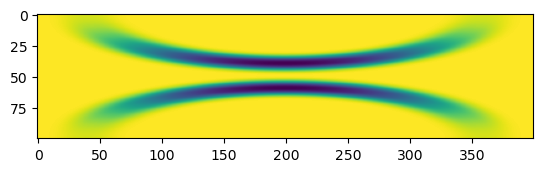

In [13]:
cmap = mpl.colormaps['viridis_r']
fig, ax = plt.subplots()
im = ax.imshow(b2_, cmap=cmap)

In [17]:
np.max(b2_)

0.9992647134632194

In [14]:
a = np.array([[0, 1, 2], [3, 4, 5]])

In [15]:
a.shape

(2, 3)